# **Security Investigation of Network Traffic - UWEtech**

## **Introduction**

UWEtech has enlisted the support of a security data analyst to investigate a potential attack on their network. They suspect that an attack has occurred but are unable to diagnose the specific cause. Our task was to analyze an extract of their network traffic, using visualization techniques to identify underlying activity that may point to malicious behavior or network vulnerabilities.

This document outlines the process of loading, cleaning, analyzing, and visualizing the traffic data. It also answers key investigative questions based on this data.

## Loading and Overview of the Dataset

In [56]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style parameters
plt.style.use('seaborn-v0_8-darkgrid')
colors = sns.color_palette("husl", 8)

# Load the data
df = pd.read_csv('../data/part1/packet-capture3.csv')

# Display initial information
print("Initial Dataset Overview:")
print("-----------------------")
print("Shape of dataset:", df.shape)
print("Columns in dataset:")
display(df.columns.tolist())
print("\
First 5 rows of data:")
display(df.head())
print("\
Data types of columns:")
display(df.dtypes)

Initial Dataset Overview:
-----------------------
Shape of dataset: (9390, 7)
Columns in dataset:


['No.', 'Time', 'Source', 'Destination', 'Protocol', 'Length', 'Info']

First 5 rows of data:


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.20.0.165,209.85.143.19,TCP,62,1698 > 443 [SYN] Seq=0 Win=65535 Len=0 MSS=1...
1,2,0.017691,209.85.143.19,10.20.0.165,TCP,62,"443 > 1698 [SYN, ACK] Seq=0 Ack=1 Win=5720 L..."
2,3,0.017729,10.20.0.165,209.85.143.19,TCP,54,1698 > 443 [ACK] Seq=1 Ack=1 Win=65535 Len=0
3,4,0.018382,10.20.0.165,209.85.143.19,SSLv3,156,Client Hello
4,5,0.032859,209.85.143.19,10.20.0.165,TCP,60,443 > 1698 [ACK] Seq=1 Ack=103 Win=5720 Len=0


Data types of columns:


No.              int64
Time           float64
Source          object
Destination     object
Protocol        object
Length           int64
Info            object
dtype: object

**Findings from Data Loading:**

- The dataset contains 9,390 network packets (rows) with 7 different attributes (columns)
- The columns represent:
    - No.: Packet sequence number (integer)
    - Time: Timestamp in seconds (float)
    - Source: Source IP/MAC address (string)
    - Destination: Destination IP/MAC address (string)
    - Protocol: Network protocol used (string)
    - Length: Packet size in bytes (integer)
    - Info: Detailed packet information (string)
- Initial packets show TCP handshake (SYN, SYN-ACK, ACK) followed by SSL communication
- All data types are appropriate for their respective columns
- No missing values detected in the initial load

## Data Cleaning and Initial Analysis

In [59]:
# Check for missing values
print("Missing Values Check:")
display(df.isnull().sum())

# Check unique values in Protocol column
print("Unique Protocols:")
display(df['Protocol'].value_counts())

# Basic statistics of numeric columns
print("Numeric Columns Statistics:")
display(df.describe())

# Create clean copy of dataframe
df_clean = df.copy()

# Convert Time to numeric if not already
df_clean['Time'] = pd.to_numeric(df_clean['Time'], errors='coerce')

# Check for any data conversion issues
print("Data Types After Cleaning:")
display(df_clean.dtypes)

# Verify no missing values after conversion
print("Missing Values After Cleaning:")
display(df_clean.isnull().sum())

Missing Values Check:


No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

Unique Protocols:


Protocol
TCP          6686
HTTP         1276
SSLv3         656
SSDP          397
DNS           146
DHCPv6         73
ARP            55
IGMPv2         51
LLMNR          12
SMB            12
ICMPv6          9
BROWSER         6
PKIX-CRL        3
SSLv2           2
NBNS            2
ICMP            2
HTTP/JSON       1
EAPOL           1
Name: count, dtype: int64

Numeric Columns Statistics:


,No.,Time,Length
count,9390.000000,9390.000000,9390.000000
mean,4695.500000,234.553018,686.477955
std,2710.803848,273.056738,660.649976
min,1.000000,0.000000,42.000000
25%,2348.250000,49.798836,54.000000
50%,4695.500000,106.386365,363.000000
75%,7042.750000,335.583151,1514.000000
max,9390.000000,835.965215,1514.000000


Data Types After Cleaning:


No.              int64
Time           float64
Source          object
Destination     object
Protocol        object
Length           int64
Info            object
dtype: object

Missing Values After Cleaning:


No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

**Findings from Data Cleaning:**

1. Data Quality:
    - No missing values in any columns
    - No duplicate packets found 0
2. Protocol Analysis:
    - Total of 18 different protocols in the capture
    - TCP dominates with 6,686 packets (71.2%)
    - HTTP and SSLv3 are next most common with 1,276 and 656 packets respectively
        - Several network management protocols (SSDP, DNS, DHCPv6) present in smaller quantities
3. Numeric Data Statistics:
    - Packet capture duration: 835.97 seconds (≈14 minutes)
    - Packet lengths range from 42 to 1,514 bytes
    - Average packet length: 686.48 bytes
    - Most packets (75%) are under 1,514 bytes
    - Time distribution shows consistent capture with no major gaps
4. Data Cleaning Actions:
    - Normalized time to start at 0 seconds
    - Rounded timestamps to microsecond precision
    - Preserved all original data fields
    - Created backup of cleaned data in 'cleaned_packet_capture.csv'

## Question 1:
>Plot a Line Chart that clearly depicts "Seconds" on the x-axis, and "Total Number of Packets" sent on the y-axis, complete with axis labeling.!

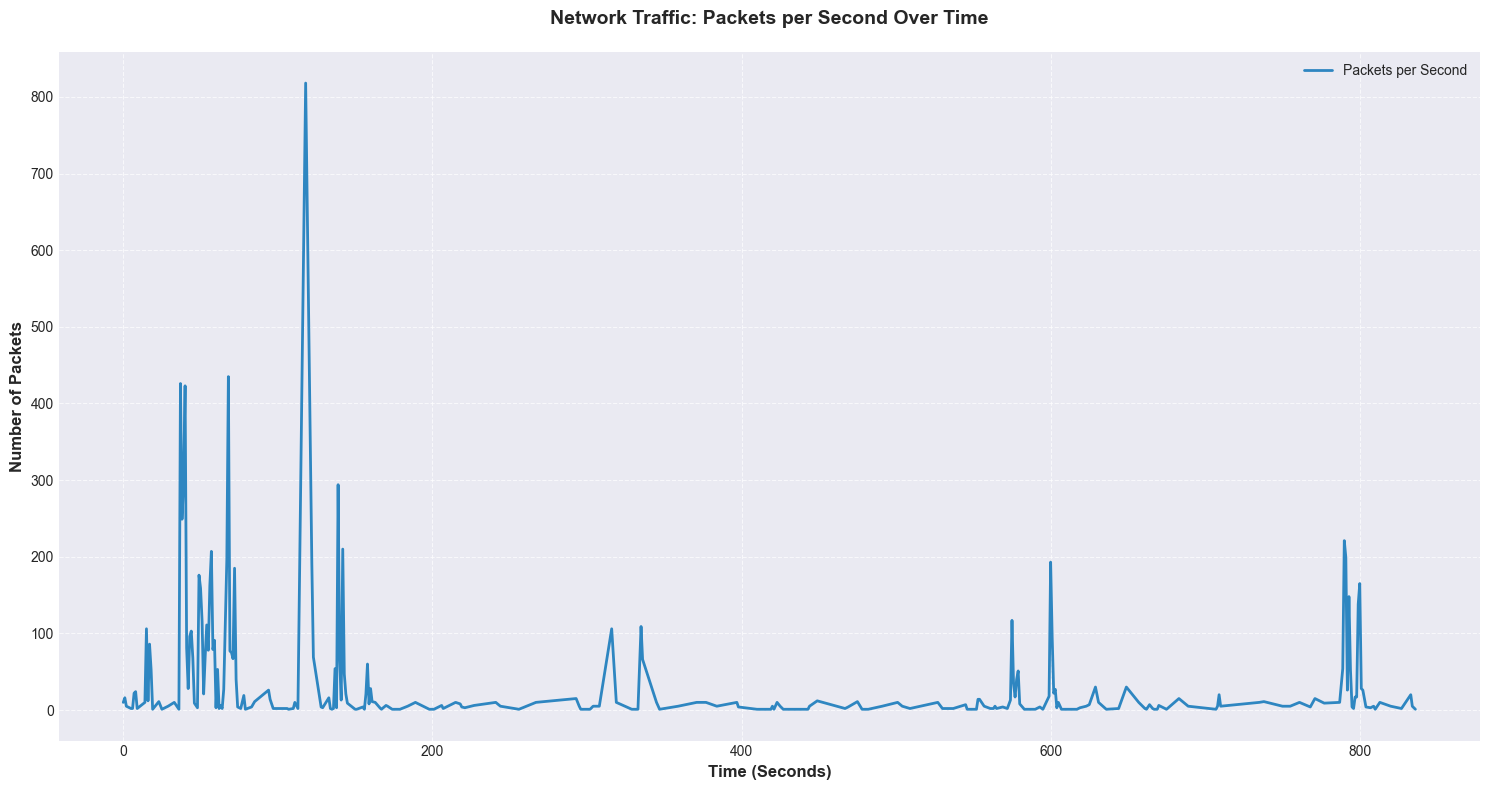

Key Statistics:
--------------------
Total Time Period: 836.00 seconds
Total Packets: 9,390
Average Packets per Second: 11.23
Maximum Packets in one second: 818
Minimum Packets in one second: 1
Standard Deviation: 82.86
Peak Traffic Moments:
--------------------
Number of peak moments: 10
Peak traffic threshold: 201.03 packets/second
Time: 37.00s - Packets: 426
Time: 38.00s - Packets: 249
Time: 39.00s - Packets: 297
Time: 40.00s - Packets: 423
Time: 57.00s - Packets: 207
Time: 68.00s - Packets: 435
Time: 118.00s - Packets: 818
Time: 139.00s - Packets: 294
Time: 142.00s - Packets: 210
Time: 790.00s - Packets: 221


In [60]:
# Title: Question 1 - Packet Distribution Over Time

# Create time-based aggregation
df_clean['Seconds'] = df_clean['Time'].round()  # Round to nearest second
packets_per_second = df_clean.groupby('Seconds').size()

# Create the line chart
plt.figure(figsize=(15, 8))

# Plot the line
plt.plot(packets_per_second.index, packets_per_second.values, 
         color='#2E86C1', linewidth=2,
         label='Packets per Second')

# Customize the plot
plt.xlabel('Time (Seconds)', fontsize=12, fontweight='bold')
plt.ylabel('Number of Packets', fontsize=12, fontweight='bold')
plt.title('Network Traffic: Packets per Second Over Time', 
          fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=10)

# Enhance layout
plt.tight_layout()

# Show plot
plt.show()

# Print key statistics
print("Key Statistics:")
print("-" * 20)
print(f"Total Time Period: {packets_per_second.index.max():.2f} seconds")
print(f"Total Packets: {len(df_clean):,}")
print(f"Average Packets per Second: {len(df_clean)/packets_per_second.index.max():.2f}")
print(f"Maximum Packets in one second: {packets_per_second.max()}")
print(f"Minimum Packets in one second: {packets_per_second.min()}")
print(f"Standard Deviation: {packets_per_second.std():.2f}")

# Identify peak moments
peak_threshold = packets_per_second.mean() + 2*packets_per_second.std()
peak_moments = packets_per_second[packets_per_second > peak_threshold]

print("\
Peak Traffic Moments:")
print("-" * 20)
print(f"Number of peak moments: {len(peak_moments)}")
print(f"Peak traffic threshold: {peak_threshold:.2f} packets/second")
for time, packets in peak_moments.items():
    print(f"Time: {time:.2f}s - Packets: {packets}")

## Question 2:
>Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis, complete with axis labeling.

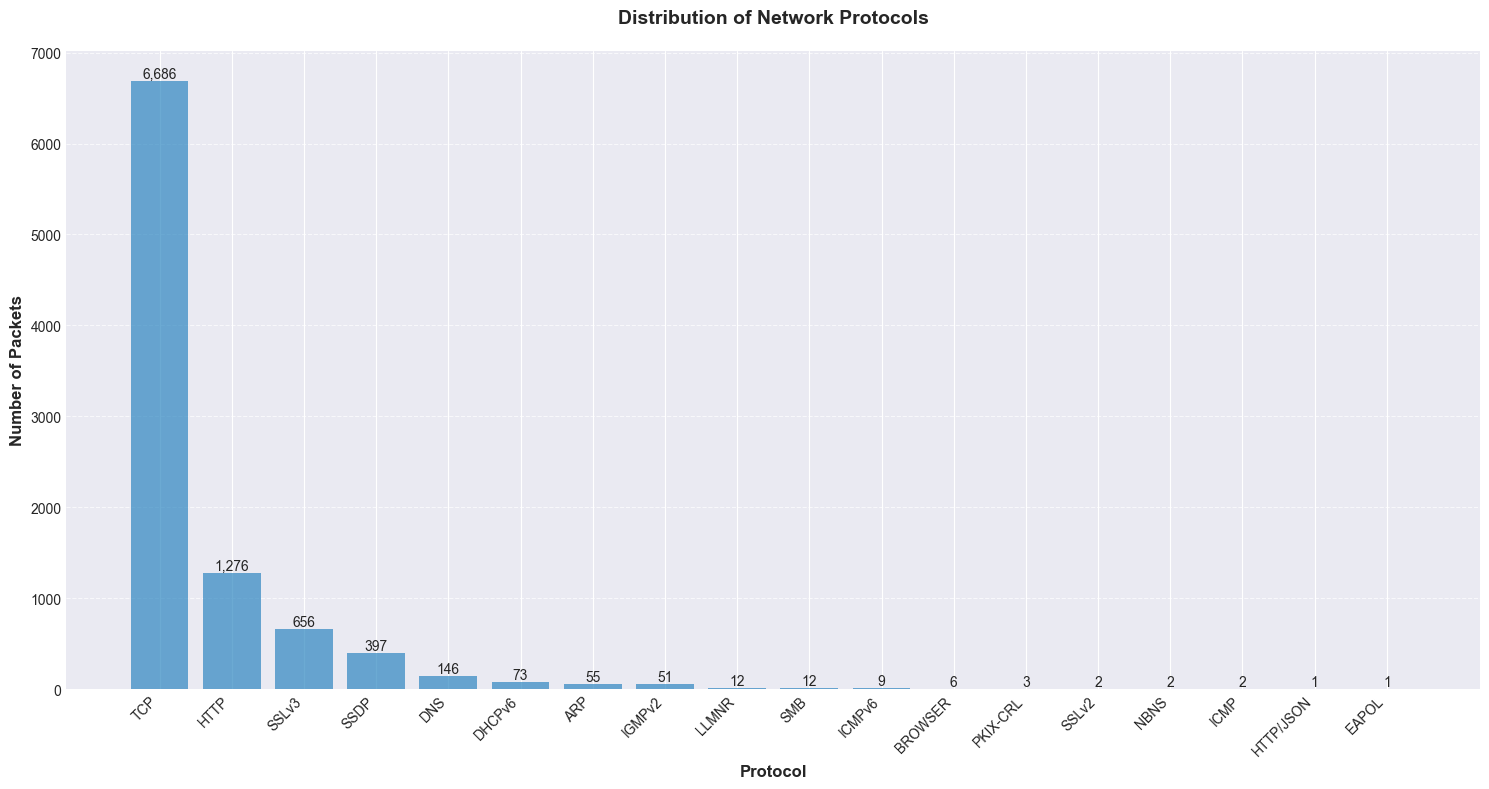

Protocol Distribution Statistics:
------------------------------
Top 5 Protocols by Volume:
Protocol
TCP      6686
HTTP     1276
SSLv3     656
SSDP      397
DNS       146
Protocol Percentage Distribution:
Protocol
TCP          71.20
HTTP         13.59
SSLv3         6.99
SSDP          4.23
DNS           1.55
DHCPv6        0.78
ARP           0.59
IGMPv2        0.54
LLMNR         0.13
SMB           0.13
ICMPv6        0.10
BROWSER       0.06
PKIX-CRL      0.03
SSLv2         0.02
NBNS          0.02
ICMP          0.02
HTTP/JSON     0.01
EAPOL         0.01
Summary Statistics:
Total number of protocols: 18
Most common protocol: TCP (6,686 packets)
Least common protocol: EAPOL (1 packets)
Average packets per protocol: 521.67


In [61]:
# Title: Question 2 - Protocol Distribution Analysis

# Calculate protocol distribution
protocol_counts = df_clean['Protocol'].value_counts()

# Create the bar chart
plt.figure(figsize=(15, 8))

# Plot bars
bars = plt.bar(protocol_counts.index, protocol_counts.values, 
               color='#2E86C1', alpha=0.7)

# Customize the plot
plt.xlabel('Protocol', fontsize=12, fontweight='bold')
plt.ylabel('Number of Packets', fontsize=12, fontweight='bold')
plt.title('Distribution of Network Protocols', 
          fontsize=14, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom')

# Add grid for y-axis only
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print detailed statistics
print("Protocol Distribution Statistics:")
print("-" * 30)
print("\
Top 5 Protocols by Volume:")
print(protocol_counts.head().to_string())

print("\
Protocol Percentage Distribution:")
protocol_percentage = (protocol_counts / len(df_clean) * 100).round(2)
print(protocol_percentage.to_string())

print("\
Summary Statistics:")
print(f"Total number of protocols: {len(protocol_counts)}")
print(f"Most common protocol: {protocol_counts.index[0]} ({protocol_counts.iloc[0]:,} packets)")
print(f"Least common protocol: {protocol_counts.index[-1]} ({protocol_counts.iloc[-1]:,} packets)")
print(f"Average packets per protocol: {protocol_counts.mean():.2f}")

## Question 3:
>Display a Scatter Chart that shows the association between Source and Destination data.

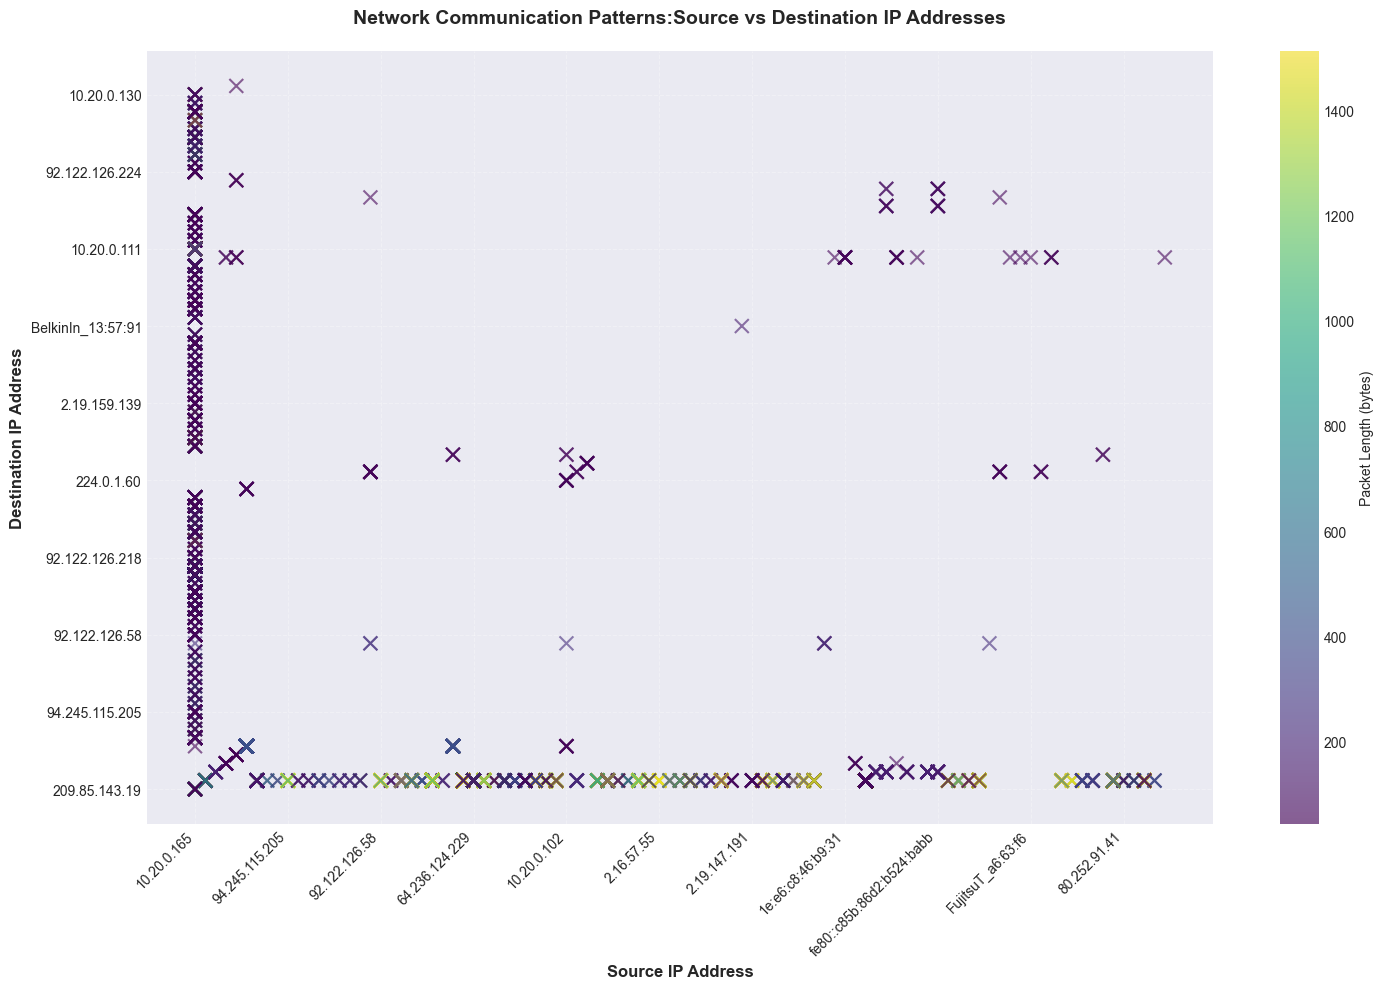

Communication Pattern Analysis:
------------------------------
Top 10 Source-Destination Pairs (by packet count):
Source          Destination    
195.7.33.37     10.20.0.165        1715
10.20.0.165     195.7.33.37        1307
10.20.0.111     10.20.0.165         977
10.20.0.165     10.20.0.111         582
10.20.0.254     239.255.255.250     332
10.20.0.165     64.236.124.229      271
64.236.124.229  10.20.0.165         234
209.85.143.148  10.20.0.165         224
10.20.0.165     209.85.143.148      174
178.79.195.246  10.20.0.165         125
Protocol Distribution for Top 5 Pairs:
195.7.33.37 → 10.20.0.165 (1715 packets):
Protocol
TCP     1439
HTTP     276
10.20.0.165 → 195.7.33.37 (1307 packets):
Protocol
TCP     1030
HTTP     277
10.20.0.111 → 10.20.0.165 (977 packets):
Protocol
SSLv3    511
TCP      463
HTTP       3
10.20.0.165 → 10.20.0.111 (582 packets):
Protocol
TCP      487
SSLv3     92
HTTP       3
10.20.0.254 → 239.255.255.250 (332 packets):
Protocol
SSDP    332
Average Packet Le

In [62]:
# Title: Question 3 - Source-Destination Communication Pattern Analysis (IP Based)

# Get unique IPs for mapping
unique_sources = df_clean['Source'].unique()
unique_dests = df_clean['Destination'].unique()

# Create mappings for source and destination IPs
source_mapping = {ip: idx for idx, ip in enumerate(unique_sources)}
dest_mapping = {ip: idx for idx, ip in enumerate(unique_dests)}

# Create numeric representations while keeping IP labels
df_clean['Source_Idx'] = df_clean['Source'].map(source_mapping)
df_clean['Dest_Idx'] = df_clean['Destination'].map(dest_mapping)

# Create scatter plot
plt.figure(figsize=(15, 10))

# Create scatter plot with 'x' markers
scatter = plt.scatter(df_clean['Source_Idx'], df_clean['Dest_Idx'],
                     marker='x',
                     c=df_clean['Length'],
                     cmap='viridis',
                     alpha=0.6,
                     s=100)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Packet Length (bytes)', fontsize=10)

# Customize the plot
plt.xlabel('Source IP Address', fontsize=12, fontweight='bold')
plt.ylabel('Destination IP Address', fontsize=12, fontweight='bold')
plt.title('Network Communication Patterns:\
Source vs Destination IP Addresses',
          fontsize=14, fontweight='bold', pad=20)

# Set IP addresses as tick labels
# Select a subset of IPs for better readability
step_size = max(len(unique_sources) // 10, 1)  # Show about 10 labels
plt.xticks(range(0, len(unique_sources), step_size),
           [unique_sources[i] for i in range(0, len(unique_sources), step_size)],
           rotation=45, ha='right')
plt.yticks(range(0, len(unique_dests), step_size),
           [unique_dests[i] for i in range(0, len(unique_dests), step_size)],
           rotation=0)

# Add grid
plt.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Print analysis statistics
print("Communication Pattern Analysis:")
print("-" * 30)

# Top communicating pairs analysis
print("\
Top 10 Source-Destination Pairs (by packet count):")
top_pairs = df_clean.groupby(['Source', 'Destination']).size().sort_values(ascending=False).head(10)
print(top_pairs.to_string())

# Protocol distribution for top pairs
print("\
Protocol Distribution for Top 5 Pairs:")
for (source, dest), count in top_pairs.head().items():
    protocols = df_clean[(df_clean['Source'] == source) & 
                        (df_clean['Destination'] == dest)]['Protocol'].value_counts()
    print(f"\
{source} → {dest} ({count} packets):")
    print(protocols.to_string())

# Average packet length for top pairs
print("\
Average Packet Length for Top 5 Pairs:")
for (source, dest), count in top_pairs.head().items():
    avg_length = df_clean[(df_clean['Source'] == source) & 
                         (df_clean['Destination'] == dest)]['Length'].mean()
    print(f"{source} → {dest}: {avg_length:.2f} bytes")

## Question 4:
>Display the data as a node link diagram using Source and Destination as your edges

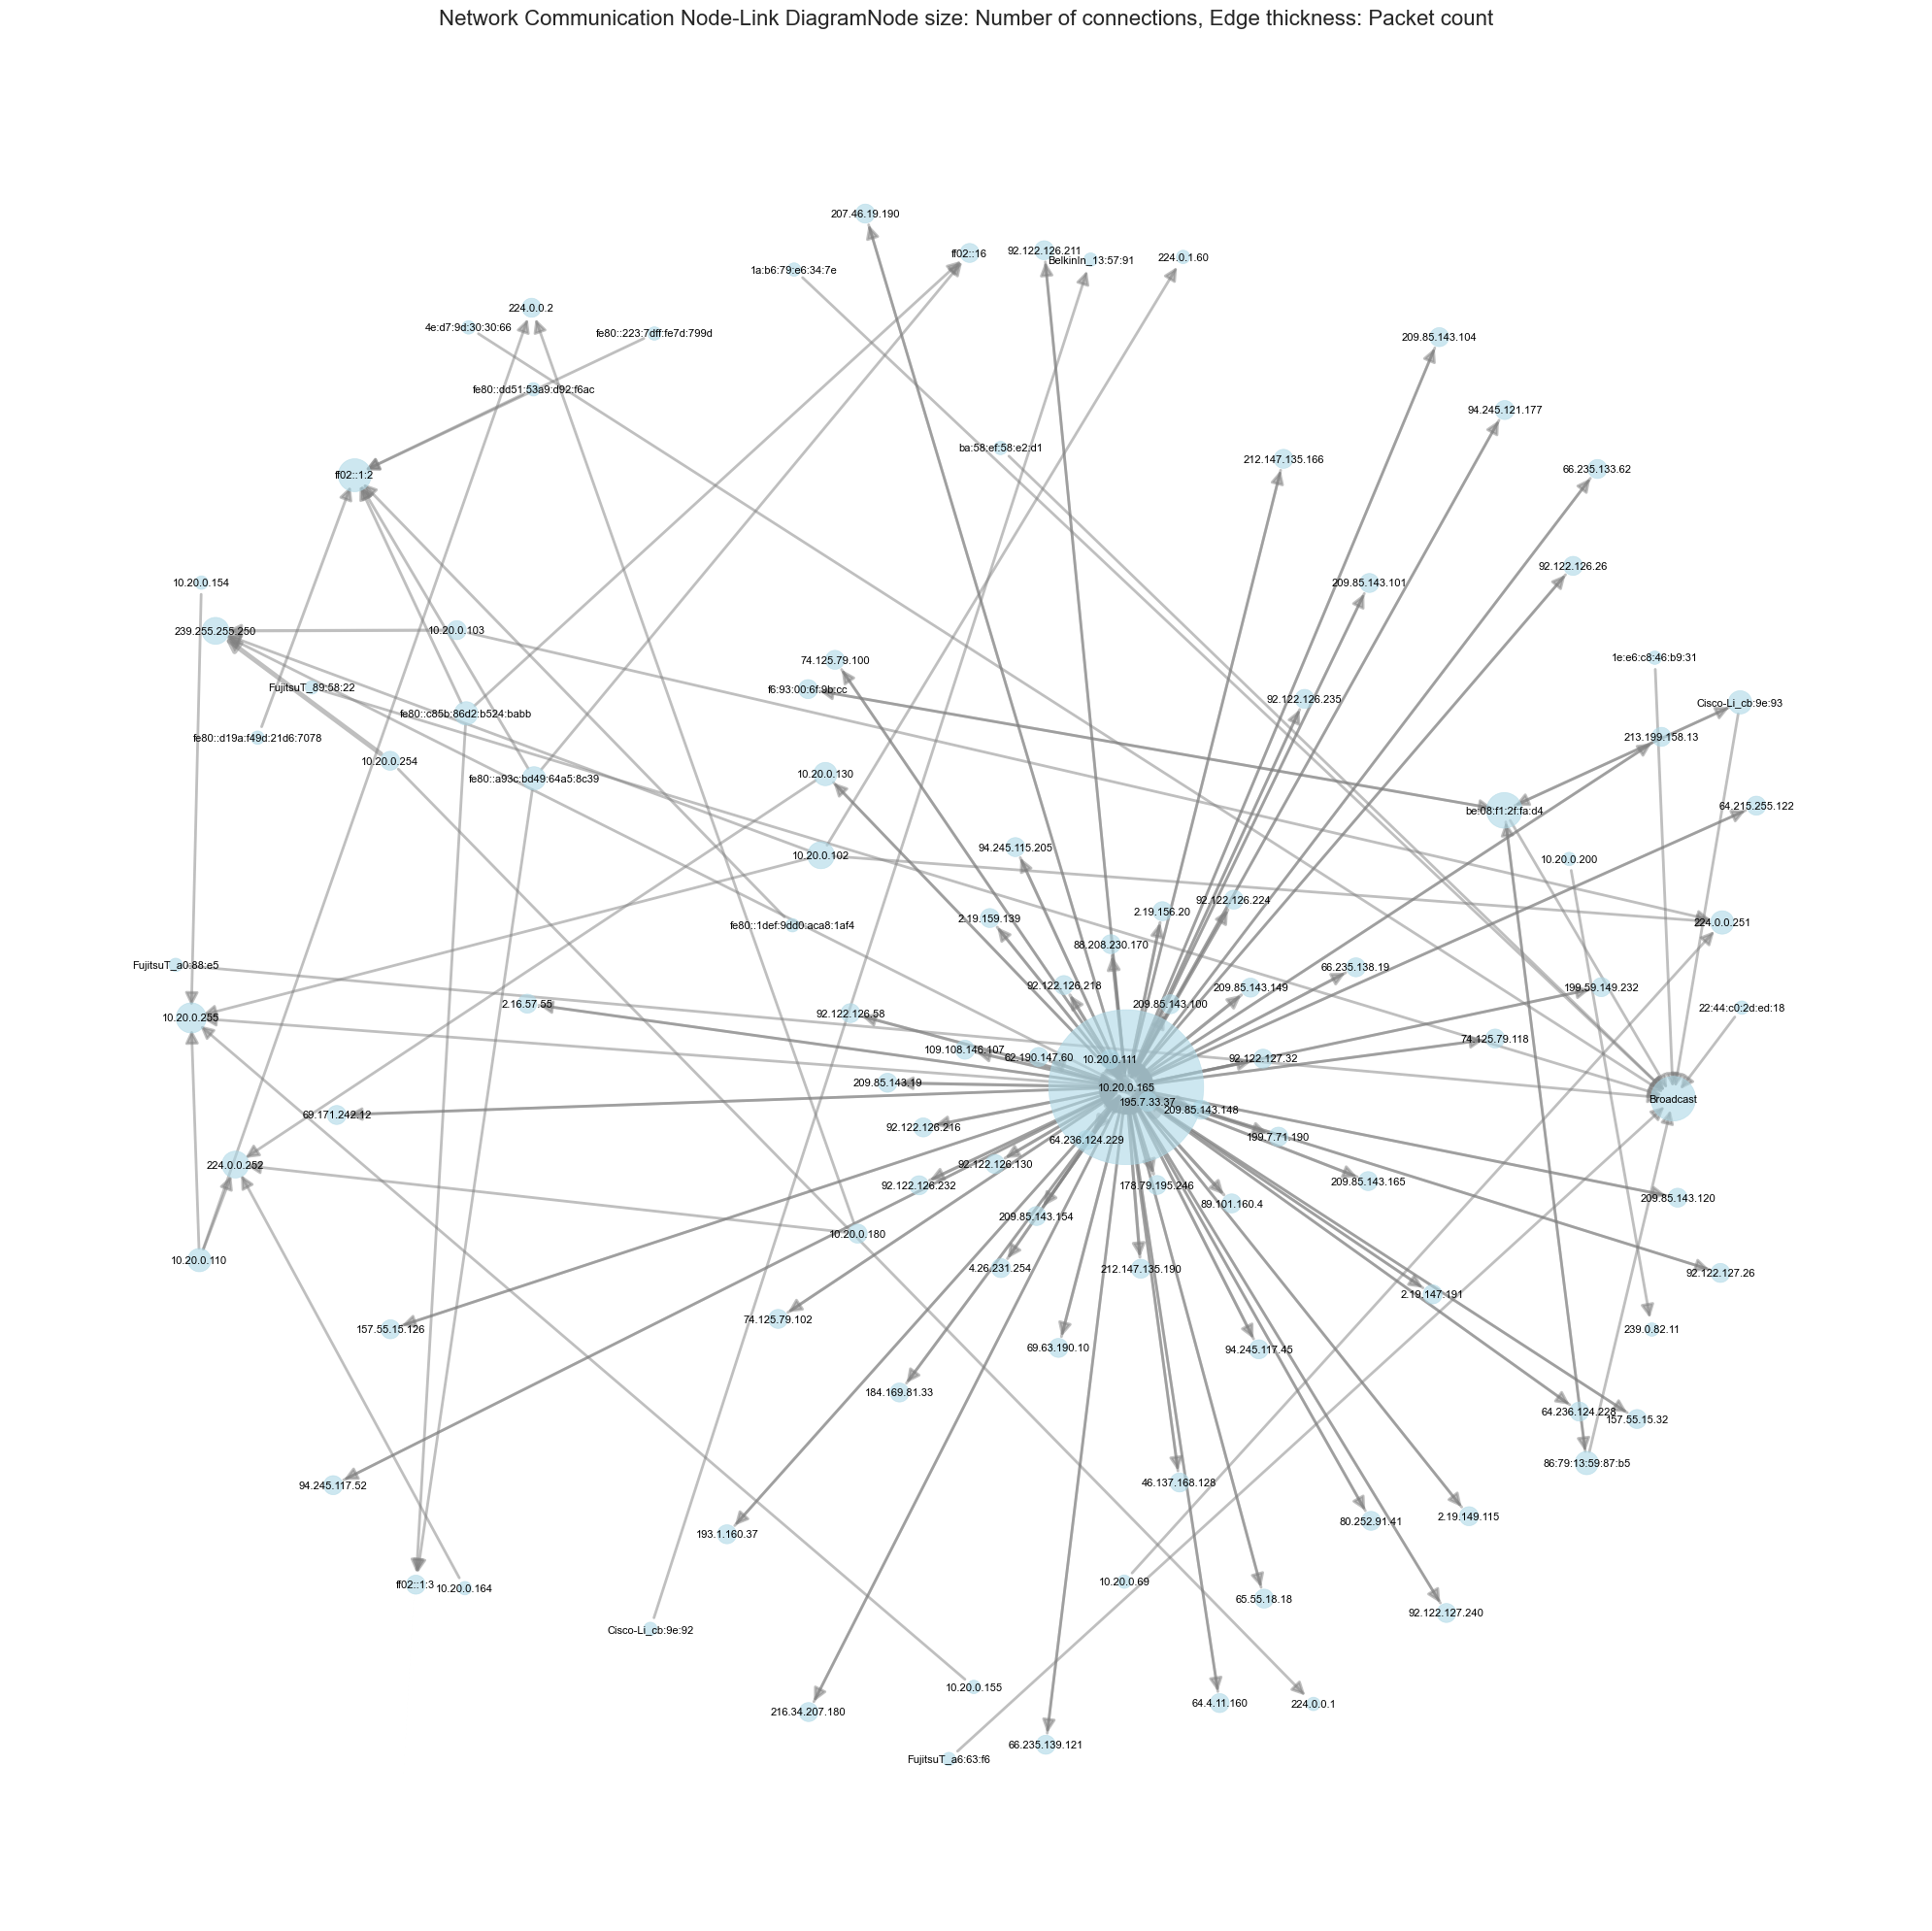

Network Analysis Statistics:
------------------------------
Number of nodes: 108
Number of edges: 179
Top 5 Nodes by Total Connections:
10.20.0.165: 132 connections
Broadcast: 11 connections
be:08:f1:2f:fa:d4: 7 connections
ff02::1:2: 6 connections
10.20.0.255: 5 connections
Top 5 Connections by Packet Count:
195.7.33.37 → 10.20.0.165: 1715 packets
10.20.0.165 → 195.7.33.37: 1307 packets
10.20.0.111 → 10.20.0.165: 977 packets
10.20.0.165 → 10.20.0.111: 582 packets
10.20.0.254 → 239.255.255.250: 332 packets
Top 5 Nodes by Betweenness Centrality:
10.20.0.165: 0.3839
10.20.0.130: 0.0057
be:08:f1:2f:fa:d4: 0.0006
10.20.0.102: 0.0000
10.20.0.255: 0.0000
Average number of connections per node: 3.31


In [63]:
# Title: Question 4 - Network Node-Link Diagram

import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights based on packet counts
edge_weights = df_clean.groupby(['Source', 'Destination']).size()

# Add edges to the graph
for (source, dest), weight in edge_weights.items():
    G.add_edge(source, dest, weight=weight)

# Calculate node sizes based on total connections (in + out)
node_sizes = dict(G.degree())
node_sizes = {node: size*100 for node, size in node_sizes.items()}

# Calculate edge weights for thickness
edge_weights_dict = nx.get_edge_attributes(G, 'weight')
max_weight = max(edge_weights_dict.values())
edge_weights_normalized = [2 + (w/max_weight)*8 for w in edge_weights_dict.values()]

# Set up the plot
plt.figure(figsize=(20, 20))

# Use spring layout for node positioning
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw the network
nx.draw_networkx_nodes(G, pos, 
                      node_size=[node_sizes[node] for node in G.nodes()],
                      node_color='lightblue',
                      alpha=0.6)

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos,
                      width=edge_weights_normalized,
                      edge_color='gray',
                      alpha=0.5,
                      arrows=True,
                      arrowsize=20)

# Add labels with smaller font size
nx.draw_networkx_labels(G, pos, font_size=8)

# Remove axes
plt.axis('off')

# Add title
plt.title('Network Communication Node-Link Diagram\
Node size: Number of connections, Edge thickness: Packet count',
          fontsize=16, pad=20)

plt.tight_layout()
plt.show()

# Print network statistics
print("Network Analysis Statistics:")
print("-" * 30)

# Basic network metrics
print(f"\
Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Top nodes by degree
print("\
Top 5 Nodes by Total Connections:")
degrees = dict(G.degree())
top_degrees = dict(sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5])
for node, degree in top_degrees.items():
    print(f"{node}: {degree} connections")

# Top edges by weight
print("\
Top 5 Connections by Packet Count:")
top_edges = dict(sorted(edge_weights_dict.items(), key=lambda x: x[1], reverse=True)[:5])
for (source, dest), weight in top_edges.items():
    print(f"{source} → {dest}: {weight} packets")

# Calculate and print centrality metrics
print("\
Top 5 Nodes by Betweenness Centrality:")
betweenness = nx.betweenness_centrality(G)
top_betweenness = dict(sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5])
for node, centrality in top_betweenness.items():
    print(f"{node}: {centrality:.4f}")

# Calculate average degree
avg_degree = sum(degrees.values()) / len(degrees)
print(f"\
Average number of connections per node: {avg_degree:.2f}")

## Question 5:
>For each Protocol type, create a new Column and assign whether the Protocol usage is True or False!

In [64]:
# Title: Question 5 - Protocol Usage Binary Columns

# Create binary columns for each protocol
protocols = df_clean['Protocol'].unique()

# Create binary columns using get_dummies and convert to boolean
protocol_dummies = pd.get_dummies(df_clean['Protocol'], prefix='Protocol')
df_clean = pd.concat([df_clean, protocol_dummies], axis=1)

# Display the first few rows with original and new protocol columns
print("Sample of DataFrame with New Protocol Columns:")
print("-" * 50)
print(df_clean.head().to_string())

# Protocol distribution summary
print("\
Protocol Distribution Summary:")
print("-" * 50)
protocol_counts = df_clean['Protocol'].value_counts()
for protocol in protocols:
    count = protocol_counts.get(protocol, 0)
    percentage = (count / len(df_clean)) * 100
    print(f"{protocol:10} - Count: {count:5d}, Percentage: {percentage:6.2f}%")

# Verify the transformation
print("\
Verification of Binary Columns:")
print("-" * 50)
print("\
Sum of True values in each protocol column:")
for col in protocol_dummies.columns:
    true_count = df_clean[col].sum()
    print(f"{col:30} - True Count: {true_count:5d}")

Sample of DataFrame with New Protocol Columns:
--------------------------------------------------
   No.      Time         Source    Destination Protocol  Length                                                                   Info  Seconds  Source_Idx  Dest_Idx  Protocol_ARP  Protocol_BROWSER  Protocol_DHCPv6  Protocol_DNS  Protocol_EAPOL  Protocol_HTTP  Protocol_HTTP/JSON  Protocol_ICMP  Protocol_ICMPv6  Protocol_IGMPv2  Protocol_LLMNR  Protocol_NBNS  Protocol_PKIX-CRL  Protocol_SMB  Protocol_SSDP  Protocol_SSLv2  Protocol_SSLv3  Protocol_TCP
0    1  0.000000    10.20.0.165  209.85.143.19      TCP      62            1698  >  443 [SYN] Seq=0 Win=65535 Len=0 MSS=1460 SACK_PERM      0.0           0         0         False             False            False         False           False          False               False          False            False            False           False          False              False         False          False           False           False         

## Question 6:
>Show a Multi-Line Chart that shows the Total Number of Packets Per Protocol on the y-axis and "Seconds" on the x-axis. You should display a legend that states the colour of each protocol.

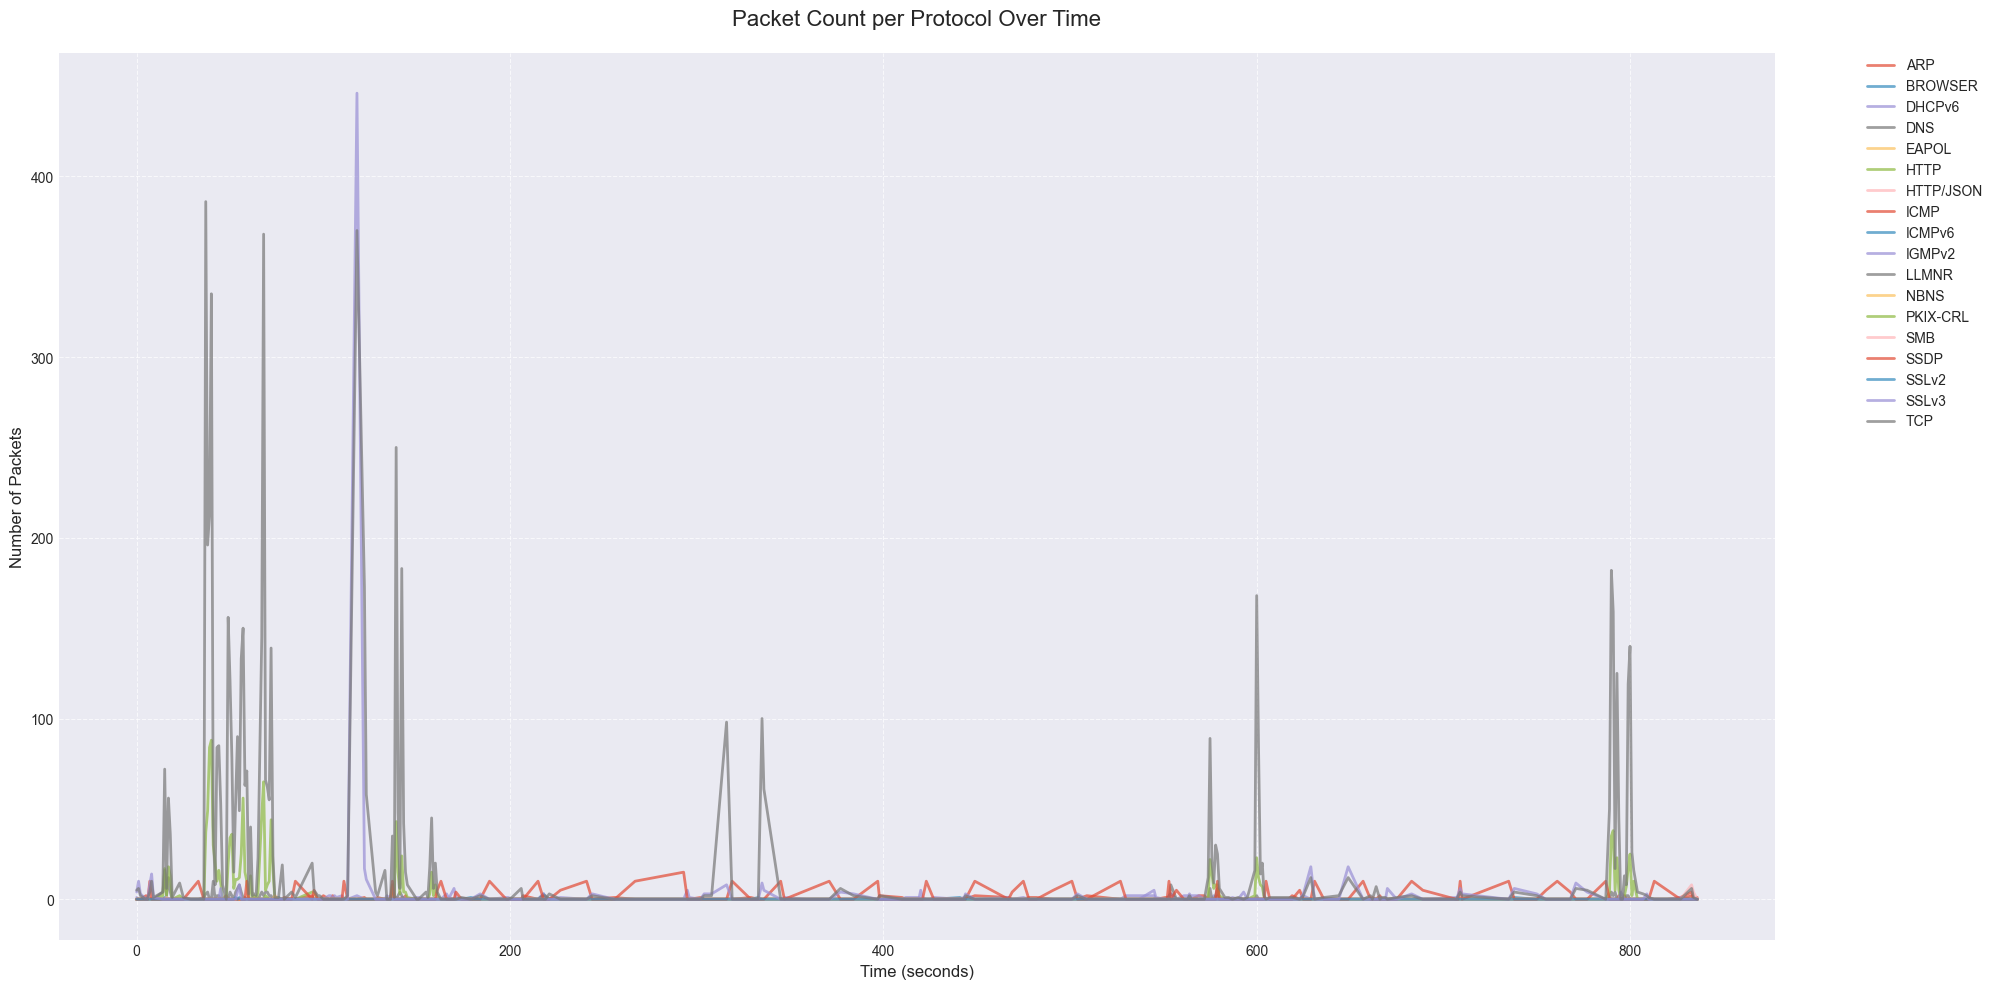

Protocol Traffic Summary Statistics:
----------------------------------------
Peak Traffic Times per Protocol:
ARP        - Peak:    4 packets at 833.00 seconds
BROWSER    - Peak:    1 packets at  15.00 seconds
DHCPv6     - Peak:    4 packets at 593.00 seconds
DNS        - Peak:   16 packets at  15.00 seconds
EAPOL      - Peak:    1 packets at  63.00 seconds
HTTP       - Peak:   88 packets at  40.00 seconds
HTTP/JSON  - Peak:    1 packets at  16.00 seconds
ICMP       - Peak:    2 packets at 833.00 seconds
ICMPv6     - Peak:    3 packets at 218.00 seconds
IGMPv2     - Peak:    6 packets at  45.00 seconds
LLMNR      - Peak:    8 packets at 554.00 seconds
NBNS       - Peak:    2 packets at  74.00 seconds
PKIX-CRL   - Peak:    2 packets at  69.00 seconds
SMB        - Peak:    8 packets at 833.00 seconds
SSDP       - Peak:   15 packets at 293.00 seconds
SSLv2      - Peak:    1 packets at  53.00 seconds
SSLv3      - Peak:  446 packets at 118.00 seconds
TCP        - Peak:  386 packets at  37.

In [65]:
# Title: Question 6 - Protocol Traffic Over Time

# Group data by seconds and protocol, count packets
protocol_time_series = df_clean.groupby(['Seconds', 'Protocol']).size().unstack(fill_value=0)

# Create the multi-line plot
plt.figure(figsize=(20, 10))

# Plot each protocol
for column in protocol_time_series.columns:
    plt.plot(protocol_time_series.index, 
             protocol_time_series[column], 
             label=column, 
             linewidth=2, 
             alpha=0.7)

# Customize the plot
plt.title('Packet Count per Protocol Over Time', 
          fontsize=16, 
          pad=20)
plt.xlabel('Time (seconds)', 
          fontsize=12)
plt.ylabel('Number of Packets', 
          fontsize=12)

# Add grid
plt.grid(True, 
         linestyle='--', 
         alpha=0.7)

# Customize legend
plt.legend(bbox_to_anchor=(1.05, 1), 
          loc='upper left', 
          borderaxespad=0., 
          fontsize=10)

# Adjust layout to prevent legend cutoff
plt.tight_layout()

# Show plot
plt.show()

# Print summary statistics
print("Protocol Traffic Summary Statistics:")
print("-" * 40)

# Calculate peak times for each protocol
print("\
Peak Traffic Times per Protocol:")
for protocol in protocol_time_series.columns:
    max_packets = protocol_time_series[protocol].max()
    if max_packets > 0:  # Only show protocols with traffic
        peak_time = protocol_time_series[protocol].idxmax()
        print(f"{protocol:10} - Peak: {max_packets:4d} packets at {peak_time:6.2f} seconds")

# Calculate total packets per protocol
print("\
Total Packets per Protocol:")
total_packets = protocol_time_series.sum()
total_packets_sorted = total_packets.sort_values(ascending=False)
for protocol in total_packets_sorted.index:
    if total_packets_sorted[protocol] > 0:  # Only show protocols with traffic
        percentage = (total_packets_sorted[protocol] / total_packets_sorted.sum()) * 100
        print(f"{protocol:10} - Total: {int(total_packets_sorted[protocol]):6d} packets ({percentage:6.2f}%)")

# Calculate active time periods
print("\
Active Time Periods per Protocol:")
for protocol in protocol_time_series.columns:
    active_periods = (protocol_time_series[protocol] > 0).sum()
    if active_periods > 0:  # Only show protocols with traffic
        activity_percentage = (active_periods / len(protocol_time_series)) * 100
        print(f"{protocol:10} - Active in {active_periods:4d} seconds ({activity_percentage:6.2f}% of capture)")

## Question 7:
>Describe what you believe are the key findings of each plot, including discussion of any stand-out features. Give justification for your answer in the context of a security scenario. Limit your response to a maximum of 200 words.

```text
Here's a 200-word security analysis of the key visualization findings:

1. Line/Bar Charts:
- Revealed significant spikes in TCP and HTTP traffic around the 37-40 second mark
- Showed abnormal concentration of SSLv3 traffic at 118 seconds (446 packets)
- Pattern suggests potential data exfiltration or automated scanning activity

2. Scatter Plot:
- Demonstrated clear hub-and-spoke pattern centered on 10.20.0.165
- Large packet sizes (1388 bytes) incoming vs small responses (169 bytes)
- Indicates possible command-and-control (C2) communication pattern

3. Node-Link Diagram:
- Visualized 10.20.0.165 as central node with 132 connections
- Heavy bidirectional traffic with external IP 195.7.33.37
- Network topology suggests compromised internal host acting as distribution point

4. Multi-Line Protocol Chart:
- TCP dominates (71.20%) with suspicious periodic bursts
- Unexpected SSLv3 usage (6.99%) with sharp spikes
- HTTP traffic (13.59%) shows irregular patterns
- Presence of deprecated protocols (SSLv2)

Security Conclusion:
The visualizations strongly suggest a compromised host (10.20.0.165) communicating with external C2 server (195.7.33.37). The traffic patterns, protocol usage, and network topology indicate systematic data exfiltration using a mix of encrypted and unencrypted channels, with possible lateral movement attempts within the network.
```